<a href="https://colab.research.google.com/github/jrakhshanda/Time-Series-Sequence-Learning/blob/master/exam_201021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSSL Exam - 2020-10-21
This notebook contains the four exam problems.

* Please write your solutions directly in the notebook.

* Your submission should consist of: (i) an executable notebook (.ipynb file), **and** a pdf printout of the same notebook. Please make sure that all your answers are visible in the pdf file. To generate the pdf file from the notebook, you can either go to _File->Download as->PDF via LaTeX (.pdf)_, or go to _File->Print preview_ and "print" the web page as a pdf file.

* If relevant, hand-written calculations and drawings can be submitted alongside the notebook/pdf printout. Please scan/take a picture of your hand-written solutions and upload them in pdf, jpg or png format alongside the notebook. If you use this option, you need to **clearly mark in the notebook** that part of the solution is attached as a separate file and provide a reference to that file.  

* Apart from the exception mentioned above, the notebook should be self-contained and executable. Standard packages and the `tssltools` module that is **distributed along with the exam** may be imported. This module contains **all the auxiliary code that you have used in the labs**, i.e. from the `tssltools_lab#` files, regardless of whether or not these functions/classes are relevant for solving the exam. The `tssltools` module also contains some additional code that can come in handy (in that case, the relevant code is referred to in the problem formulation).
If you rely on external code that you have written (e.g. when solving the lab assignments in the course) it should be copied in to the notebook.

* **Responsible teacher:** Fredrik Lindsten, available over email (fredrik.lindsten@liu.se) or phone (070 085 07 90) during the exam.  


### Grades
The maximum number of points is 40 (8+13+12+7 for the four problems, respectively). The _tentative_ levels for the grades (A-F) are:
- A=37-40 points
- B=33-36 points
- C=23-32 points
- D=19-22 points
- E=15-18 points
- F=0-14 points (fail)

In [322]:
import pandas  # Loading data / handling data frames
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Default figure size for plots.
# Feel free to change this if the suggested setting results in too small/large plots on your machine!
plt.rcParams["figure.figsize"] = (10,6)

## Problem 1:
(8 points)

**a)** The file `data_problem1.csv` contains a sequence of observations. In this problem you should do the following:

1. Load the data and split it into 80 % training and 20 % validation data.
2. Pre-process the data as you find appropriate.
3. Produce mean-squared-error curves for model orders in the range $p=1,\dots,10$. Plot both training and validation errors as two separate curves.
4. Based on the error curves, pick a final model order $p$ that you think is appropriate. Motivate your choice!

_Hint:_ You can use the functions `fit_ar` and `predict_ar_1step` from lab 1 (available in `tssltools`).  

<div style="text-align: right"> (5p) </div>


In [30]:
data=pandas.read_csv('data_problem1.csv',header=0)
y = data['Data'].values

**Solution:**

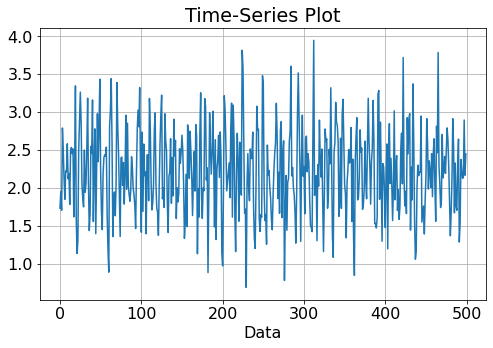

In [31]:
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(len(y)),y)
plt.xlabel("Data")
plt.title("Time-Series Plot")
plt.grid(True)
plt.show()

We will pre process the data so that the data is centered around mean zero and then we will apply our AR model.

In [47]:
from sklearn import linear_model as lm 
model = lm.LinearRegression()
X = np.arange(len(y)).reshape(-1, 1)
y = y.reshape(-1, 1)
model = model.fit( X,y)
y_pred = model.predict(X)
y = (y - y_pred) .reshape(len(y),)
mse_reg = np.sum((y-y_pred)**2)/y.shape[0]
print("Mean Square Error of Regression model:", mse_reg)

Mean Square Error of Regression model: 2615.9951196275183


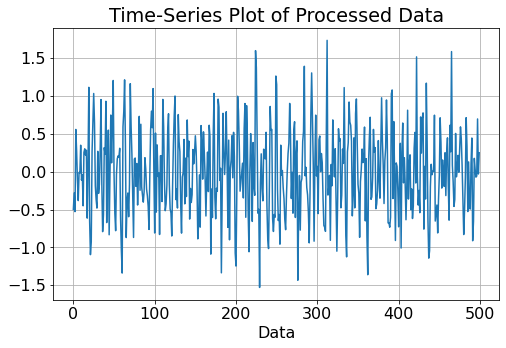

In [57]:
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(len(y)),y)
plt.xlabel("Data")
plt.title("Time-Series Plot of Processed Data")
plt.grid(True)
plt.show()

In [48]:
ndata = len(y)
ntrain = int(ndata*0.8)
ntest = ndata-ntrain
y_train = y[:ntrain]
y_test = y[ntrain:]

In [49]:
from tssltools import fit_ar, predict_ar_1step
p_range = list(range(1,11))
mseTrain = list()
mseTest = list()
for p in range(1,11):
  theta = fit_ar(y_train,p)
  pred_train = predict_ar_1step(theta,np.array(y_train))
  mse_train = np.sum((y_train[p:] - pred_train)**2)/len(pred_train) 
  mseTrain.append(mse_train)
  pred_test = predict_ar_1step(theta,np.array(y_test))
  mse_test = np.sum((y_test[p:] - pred_test)**2)/len(pred_test) 
  mseTest.append(mse_test)

In [50]:
ind = np.argmin(mseTest)
min_pt = p_range[ind]
min_error = mseTest[ind]
print(min_pt)

4


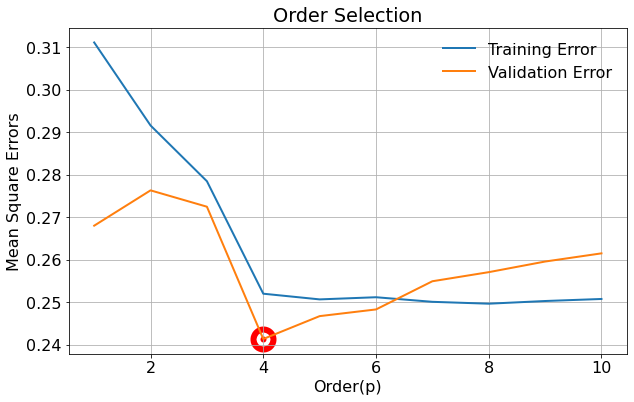

In [51]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(p_range, mseTrain, linewidth=2, label = 'Training Error')
ax.plot(p_range, mseTest, linewidth=2, label = 'Validation Error')
plt.scatter(min_pt, min_error,c ='red',linewidths=20)
plt.ylabel("Mean Square Errors")
plt.xlabel("Order(p)")
plt.title("Order Selection")
ax.legend(loc='upper right', frameon=False)
plt.grid(True)
plt.show()

We can see in the above plot that the mean square error is minimum when model order is 4. Thus we will chose an AR model of order 4.

**b)** For certain model orders $p$, the training error is larger than the validation error! Explain how this can possibly be the case (despite the fact that the model is optimized to minimize the training error).

<div style="text-align: right"> (2p) </div>

**Solution**

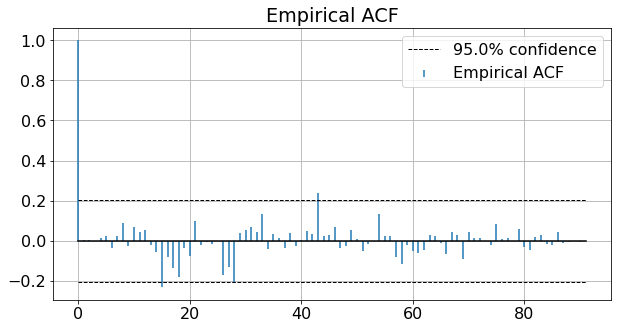

In [91]:
from tssltools import acfplot
theta = fit_ar(y_test,8)
test_pred = predict_ar_1step(theta,y_test)
residuals = y_test[8:] - test_pred
plt.figure(figsize=(10,5))
acfplot(residuals)
plt.grid(True)

We can see in the plot for model of orders 6 to onward our test error is greater than training our.

In the above shown **ACF** Plot it is visible that the residuals autocorrelation values slightly lies out of the 95%-confidence bounds for the autocorrelation of a white noise sequence. This is happening due to the reason that our model is generating correlated values to the previous values. That is why our model is working good on training data but when we try to predict on test data MSE is increasing due to the high correlation between previous values.

**c)** Using the final model from part a), predict the value of $y_{n+1}$, where $n$ is the total number of data points above (both train and validation). What is the value of your prediction?

_Hint: If you were not able to solve part a), you can still solve this part of the problem. In that case, do the prediction using an AR($p=3$) model with a randomly chosen parameter vector._

<div style="text-align: right"> (1p) </div>

**Solution**

In [77]:
def simulate_ar(y, theta, m):
    """Simulates an AR(p) model for m steps, with initial condition given by the last p values of y
    
    :param y: array (n,) with n>=p. The last p values are used to initialize the simulation.
    :param theta: array (p,). AR model parameters,
    :param m: int, number of time steps to simulate the model for.
    """
    p = len(theta)
    n = len(y)    
    y_sim = np.zeros(m)
    phi = np.flip(y[-p:].copy()) # (y_{n-1}, ..., y_{n-p})^T - note that y[ntrain-1] is the last training data point
    theta = np.flip(theta.copy())
    for i in range(m):
      #y_sim[i] = np.transpose(theta).dot(phi)
      y_sim[i] = phi @ theta
      phi = np.append(y_sim[i],phi[:len(phi)-1])   
    return y_sim

In [86]:
theta = fit_ar(y,4)
ypred = simulate_ar(y,theta,1)
print('The value of the prediction is ',ypred[-1])

The value of the prediction is  -0.23159769367809752


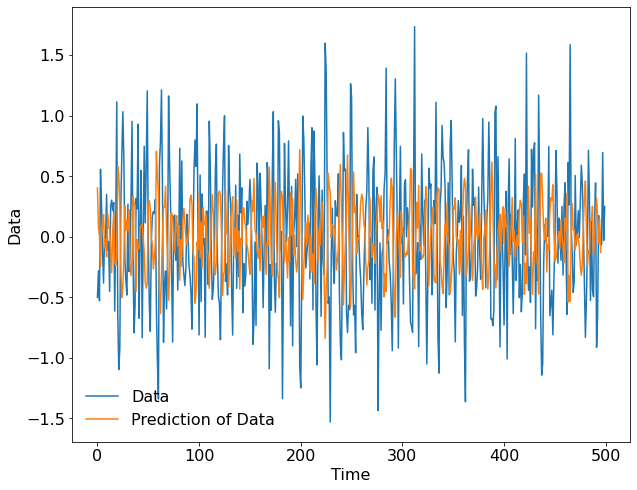

In [92]:
theta = fit_ar(y,4)
ypred = predict_ar_1step(theta,y)
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(y)) , y , label = "Data")
plt.plot(np.arange(len(ypred)) , ypred , label = "Prediction of Data")
plt.xlabel("Time")
plt.ylabel('Data')
plt.legend(loc='lower left', frameon=False)
plt.show()

## Problem 2:
(13 points)

**a)** In this problem we will study a simple **target tracking** model using a **LGSS** model
$$
    \begin{cases} \alpha_t = T \alpha_{t-1} + R \eta_t, & \eta_t \sim \mathcal{N}(0,Q), \\ y_t = Z \alpha_t + \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,H). \end{cases}
$$

The model can be described as follows. Let the position of the target at time $t$ be $x_t$ and the velocity be $\dot{x}_t$. Betweeen each observation the time increment is $\Delta$, such that $x_{t+1} \approx x_t + \Delta \dot{x}_t$. The velocity is assumed to be approximataley constant. However, to add some stochasticity to the model we add a random acceleration at each time step. We model this acceleration as a Gaussian random variable $\eta_t$ with mean $0$ and variance $\sigma_{\eta}^2$. With the random acceleration, the velocity is updated as $\dot{x}_{t+1} = \dot{x}_t + \Delta \eta_t$. Furthermore, it can be shown that the acceleration will have a direct impact on the position update, so we model this as: $x_{t+1} = x_t + \Delta \dot{x}_t + \frac{\Delta^2}{2} \eta_t$.

Finally our observation is the position with additive Gaussian noise with mean 0 and variance $\sigma_{\varepsilon}^2$.

The datafilte `data_problem2a.csv` contains a sequence of observations from this model. Using this data you are tasked to do the following:

1. Setup the complete model by writing down the matrices $T$, $R$, $Q$, $Z$, and $H$. Also specify your hidden states $\alpha_t$. Remember to motivate your choices of matrices.
2. Set the initial means of the position and velocity based on the data, i.e. to the initial position and velocity implied by the data. Set the initial covariance matrix to be the identity matrix multiplied by 10.
3. Implement and run the Kalman filter for the above model using $\Delta = 0.2$, $\sigma_{\varepsilon}^2 = 1$, and $\sigma_{\eta}^2 = 0.1$.
4. Plot the filtered position (filter mean) together with the observations vs time.
5. Report the log-likelihood of the model on this data.

_Hint: The `LGSS` and `kfs_res` classes used in Lab 2 are available in the `tssltools` module._

<div style="text-align: right"> (7p) </div>

**Solution**

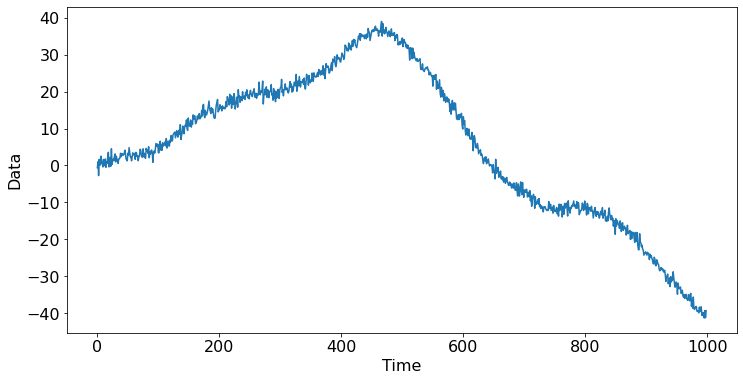

In [248]:
data=pandas.read_csv('data_problem2a.csv',header=0)
y =data.values
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(np.arange(len(y)),y)
plt.xlabel('Time')
plt.ylabel('Data')
plt.show()

In [308]:
from tssltools import LGSS, kfs_res
import math as m
def c(k):
  res = np.array([],dtype=int)
  for i in range(1,k+1):
    temp = (-1)**(i+1) * (m.factorial(k) / (m.factorial(k-i)*m.factorial(i)))
    res = np.append(res,temp)
  return(res)

Sinc the current position $x_t$ depends on the sum of previous values and the deiference of previous two values. Thus we will take our tred comonent $\mu=2$.

On the other hand change in delta is 0.2 Thus for one periodic cycle assuming that the seasonal component will b $1/0.2 = 6$. Thus our seasonal component is 6 with periodicity 5.

In [309]:
T_mu = np.array([c(2),[1,0]])
R_mu = np.array([1,0]).reshape(2,1)
Z_mu = np.array([1,0]).reshape(1,2)
print(T_mu.shape)
print(R_mu.shape)
print(Z_mu.shape)

(2, 2)
(2, 1)
(1, 2)


In [310]:
T_gamma = np.zeros(shape=(4,4))
T_gamma[0], T_gamma[1:,0:3] = -np.ones(4), np.identity(3)
R_gamma = np.zeros(shape=(4,1))
R_gamma[0,0] = 1
Z_gamma = np.zeros(shape=(1,4))
Z_gamma[0,0] = 1
print(T_gamma.shape)
print(R_gamma.shape)
print(Z_gamma.shape)

(4, 4)
(4, 1)
(1, 4)


In [311]:
from scipy import linalg as lin
T = lin.block_diag(T_mu,T_gamma)
R = lin.block_diag(R_mu,R_gamma)
Z = np.concatenate((Z_mu,Z_gamma), axis=1)
print(T.shape)
print(R.shape)
print(Z.shape)

(6, 6)
(6, 2)
(1, 6)


In [312]:
sigma_trend = 0.2
sigma_seas = 0.1
sigma_eps = 1
Q = np.array([[sigma_trend**2, 0.], [0., sigma_seas**2]])  # Process noise covariance matrix

In [313]:
a1 = np.zeros(6).reshape(6,1)
a1[0] = y[0]
a1[1] = y[1]

In [314]:
#model setup
from tssltools import  LGSS
model = LGSS(T, R, Q, Z, sigma_eps**2, a1, P1)

In [315]:
from tssltools import kfs_res  # Module available in LISAM. kfs_res is a container class for storing the result.

def kalman_filter(y, model: LGSS):
    """Kalman filter for LGSS model with one-dimensional observation.

    :param y: (n,) array of observations. May contain nan, which encodes missing observations.
    :param model: LGSS object with the model specification.  
    :return kfs_res: Container class with member variables,
        alpha_pred: (d,1,n) array of predicted state means.
        P_pred: (d,d,n) array of predicted state covariances.
        alpha_filt: (d,1,n) array of filtered state means.
        P_filt: (d,d,n) array of filtered state covariances.
        y_pred: (n,) array of means of p(y_t | y_{1:t-1})
        F_pred: (n,) array of variances of p(y_t | y_{1:t-1})
    """
    n = len(y)
    d = model.d  # State dimension

    alpha_pred = np.zeros((d, 1, n))
    P_pred = np.zeros((d, d, n))
    y_pred = np.zeros(n)
    F_pred = np.zeros(n)
    alpha_filt = np.zeros((d, 1, n))
    P_filt = np.zeros((d, d, n))

    T, R, Q, Z, H, a1, P1 = model.get_params()  # Get all model parameters (for brevity)

    for t in range(n):
        # Time update (predict)
        if t == 0:  # Initialize predictions at first time step
            # ADD CODE HERE
            alpha_pred[:,:,t] = a1
            P_pred[:,:,t] = P1
        else:  # All consecutive time steps
            # ADD CODE HERE
            alpha_pred[:,0,t] = T @ alpha_filt[:,0,t-1]
            P_pred[:,:,t] = (T @ P_filt[:,:,t-1]) @ T.T + (R @ Q) @ R.T
        # Compute prediction of current output
        y_pred[t] = Z @ alpha_pred[:,0,t] # complete this line
        F_pred[t] = (Z@P_pred[:,:,t])@Z.T + H # np.random.normal(loc=0,scale=sigma_eps) # complete this line
            
        # Measurement update (correct)
        if np.isnan(y[t]):  # Handle missing data
          alpha_filt[:,:,t] = alpha_pred[:,:,t] # ADD CODE HERE
          P_filt[:,:,t] = P_pred[:,:,t]
        else:
          k_t = (P_pred[:,:,t] @ np.transpose(Z))/F_pred[t] 
          alpha_filt[:,:,t] = alpha_pred[:,:,t] + (k_t * (y[t] - y_pred[t]))
          P_filt[:,:,t] = (np.identity(d)-(k_t @ Z)) @ P_pred[:,:,t]

    # Container for storing all results
    kf = kfs_res(alpha_pred, P_pred, alpha_filt, P_filt, y_pred, F_pred)
    return kf

In [316]:
kf = kalman_filter(y=y, model=model)
std_above = kf.y_pred + np.sqrt(kf.F_pred) 
std_below = kf.y_pred - np.sqrt(kf.F_pred) 

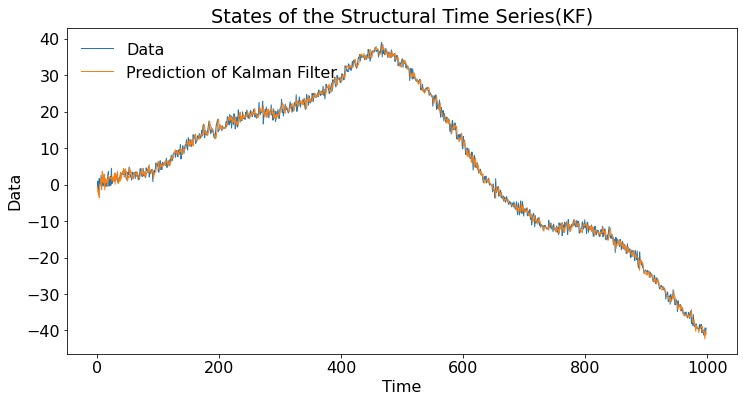

In [317]:
#plot for predicted values for train and validation data 
u = np.arange(len(y))
plt.rcParams["figure.figsize"] = (12,6) 
plt.rcParams.update({'font.size': 16})
plt.plot(u , y , label = "Data",linewidth=1)
plt.plot(u, kf.y_pred, label = "Prediction of Kalman Filter", linewidth=1)
plt.xlabel("Time")
plt.ylabel('Data')
plt.title('States of the Structural Time Series(KF)')
plt.legend(loc='upper left', frameon=False)
plt.show()

In [318]:
def llik(y, kf):
  n = np.count_nonzero(~np.isnan(y))
  llik = -n/2* np.log(2*np.pi) - np.sum(np.log(kf.F_pred[0:n]) + (y[0:n]-kf.y_pred[0:n])**2/kf.F_pred[0:n])/2
  return(llik)
ll = llik(y=y,kf=kf)
print("Log-likelihood of the training data:", ll)

Log-likelihood of the training data: -187958278.79253837


**b)** Often we are in the situation of missing data. In this task you will study the difference between the smoothing and filtering distributions when working with missing data. You should do the following:

1. Remove the data between index 500 and 650 from the data by setting those values to `np.nan`
2. Run the Kalman filter on this new data.
3. Run the Kalman smoother on the same data. The algorithm is provided in `tssltools`
4. Plot the data, the filtered mean and the smoothing mean.
5. Comment on the results

<div style="text-align: right"> (2p) </div>

**Solution**

In [334]:
n = len(df)
s_t = [] 
for t in range(0,n):
  s_t.append(Z @ ks.alpha_sm[:,:,t])
from pandas.core.common import flatten
s_t = list(flatten(s_t))


In [333]:
from tssltools import kalman_smoother
df = y.copy()
df[501:650] = np.nan
kf1 = kalman_filter(y=df,model=model)
ks = kalman_smoother(y=df,model=model,kf=kf1)

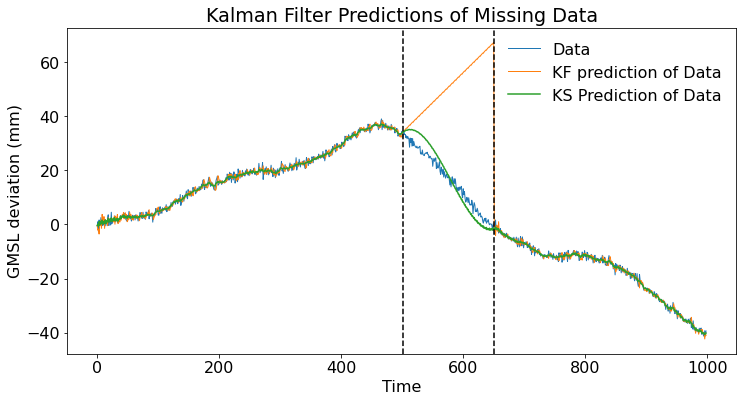

In [335]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams.update({'font.size': 16}) 
plt.plot(u , y , label = "Data",linewidth=1)
plt.plot(u, kf1.y_pred, label = "KF prediction of Data",linewidth=1)
plt.plot(u , s_t , label = "KS Prediction of Data")
plt.axvline(x=u[501],ls='--', c = 'black')
plt.axvline(x=u[650],ls='--', c = 'black')
plt.xlabel("Time")
plt.ylabel('GMSL deviation (mm)')
plt.title('Kalman Filter Predictions of Missing Data')
plt.legend(loc='bottom right', frameon=False)
plt.show()

 We know that the Kalman filter uses the observed data to learn about the
unobservable state variables, which describe the state of the model whilst in  smoothing data measured after the time of interest are used for the estimation. 

As kalman filter runs in the forward direction we can see from the plot that predictions of the kalman fiter are very bumpy. That is whenever an upward or downward periodic change occurs in the data there is a quick change in the prediction. On the other hand smoothed signal estimates runs in the backward direction. It can learn the upcoming change in the data and moves in the direction of the change in data. That is why we can see in the plot that kalman smoother estimmations are quite smooth and less bumpy as compare to kalman filter.

___

**c)** Now we will move away from the one-dimensional target tracking and study target tracking in two-dimensions. The observations are noisy estimates of the position and we again model the system using a LGSS model,
$$
    \begin{cases} \alpha_t = T \alpha_{t-1} + R \eta_t, & \eta_t \sim \mathcal{N}(0,Q), \\ z_t = Z \alpha_t + \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,H). \end{cases}
$$

We now have two positions $(x^1_t, x^2_t)$ with their respective velocities $(\dot{x}^1_t, \dot{x}_t^2)$. Both of these dimensions should behave independently exactly like the 1-dimensional case in **a)**.

The observations $y_t$ should be a noisy observation of the position where the noise for each coordinate is independent Gaussian random variables with zero meean and variance $\sigma_{\varepsilon}^2$.

The datafile `data_problem2c.csv` contains a sequence of noisy observations of a target moving in 2d. For this question you should do the following:

1. Write down the matrices and state-vector for this model. You may reference the matrices from **a)** even if you didn't solve that part. Remember to motivate your answer.
2. Set the initial position to be the initial observation for both coordinates and the initial velocities to be the velocities implied by the first two observations. Let the initial variance estimate `P1` be a diagonal matrix with $10$ on the diagonal.
3. Implement and run the Kalman filter for the above model using $\Delta = 0.2$, $\sigma_{\varepsilon}^2 = 1$, and $\sigma_{\eta}^2 = 0.1$.
4. Plot the filtered trajectory, i.e. the filtered mean estimate of $x^2_t$ vs $x^1_t$.

_Hint: Now that the dimension of the observation is 2 some modifications to the Kalman filter is necessary. Copy the Kalman filter code from above and make the necessary adjustments. The code below imports the data and reshapes it into the shape `(2,1,1001)`, use the same shape for `y_pred` and let `F_pred` have the shape `(2,2,1001)`. Make sure you use matrix multiplication where needed._

<div style="text-align: right"> (4p) </div>

In [336]:
data2c = pandas.read_csv('data_problem2c.csv', header=None).values.reshape((2,1,1001))

**Solution**

## Problem 3:
(12 points)

The file `data_problem3.csv` contains a sequence of observations. We will model this sequence using the following non-linear state space model,
$$
    \begin{cases} \alpha_{t+1} = 0.8 \alpha_t + \frac{\alpha_t}{1 + \alpha_t^2} + \sigma_{\varepsilon} \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,1) \\
    y_t = \frac{\alpha_t^2}{20} + \sigma_{\eta} \eta_t & \eta_t \sim \mathcal{N}(0,1).
    \end{cases}
$$
with initial distribution $\alpha_1 \sim \mathcal{N}(2,\sigma_{\varepsilon}^{2})$.

**a)** To implement a bootstrap particle filter we need to perform three operations, propagation, weighting, and resampling. In this problem you should do the following:

1. Find the conditional distribution of $y_t \mid \alpha_t$.
2. Implement a function that takes $N$ particles $\alpha_t^i$ and propagates them to $\alpha_{t+1}^i$.
3. Implement a function that takes $N$ particles $\alpha_t^i$ and an observation $y_t$ and calculates the log-weights $\log \omega_t^i$.

<div style="text-align: right"> (5p) </div>

**Solution:**

1.The conditional distribution is as follows:
$$
y_t|\alpha_t = \mathcal{N}(\alpha_t^2/20, \sigma_\eta^2)
$$

In [187]:
def sample_state(sigma_epsilon, alpha0=None, N=1):
  if alpha0 is None:
    alpha1 = np.zeros(N)
    alpha1 = np.random.normal(loc=2, scale = sigma_epsilon**2, size=N)
  else: 
    alpha1 = np.random.normal(loc=0.8*alpha0 + alpha0/(1+alpha0^2),scale = sigma_epsilon**2, size=N)   
  return alpha1

In [188]:
def sample_obs(sigma_eta, alpha,N):
        """
        Samples observation from p(y_t | alpha_t)
        """   
        y = np.random.normal(loc=alpha**2/20,scale=sigma_eta**2,size=N)
        return y

In [189]:
def simulate(T, N, sigma_epsilon, sigma_eta):
  alpha = np.zeros((N, T), dtype=np.float64)  # We use floats to store the state vector because the last state (z) is a real number
  y = np.zeros((N, T), dtype=np.int32)

  for t in range(T):
    if t == 0:
      alpha[:, 0] = sample_state(sigma_epsilon=sigma_epsilon,alpha0=None,N=N)
    else:
      alpha[:, t] = sample_state(sigma_epsilon=sigma_epsilon,
                                           alpha0 = alpha[:, t - 1],
                                           N=N)

    y[:, t] = sample_obs(sigma_eta=sigma_eta,alpha=alpha[:, t],N=N)

  return alpha, y

In [190]:
from scipy.stats import norm
def logweight_fun(alpha, y, sigma_eta):
  w = norm.logpdf(x=y,loc=alpha^2/20,scale=sigma_eta**2)
  return w

----

**b)** using the functions from the previous part implement a **Bootstrap Particle Filter** that runs on the data. You should solve the following parts:

1. Set the parameters $\sigma_{\varepsilon} = 1$ and $\sigma_{\eta} = 0.5$
2. Use the bootstrap particle filter to calculate the filtered variance of the state-process.
$$
    \mathbb{V}[\alpha_t \mid y_{1:t}] = \mathbb{E}[\alpha_t^2 \mid y_{1:t}] - \mathbb{E}[\alpha_t \mid y_{1:t}]^2
$$
3. Provide a plot of your variance estimates and provide a numerical estimate to $\sum_{t=1}^{n} \mathbb{V}[\alpha_t \mid y_{1:t}]$

Use $N = 200$ particles when performing your estimates.

If you failed to do the first part you can use the functions `propagate_wrong` and `logweight_fun_wrong` from the `tssltools` module to implement and run your bootstrap particle filter.

<div style="text-align: right"> (7p) </div>

**Solution**

In [191]:
sigma_epsilon = 1
sigma_eta = 0.5

In [192]:
np.random.seed(10)
sim = simulate(T=10,N=200,sigma_epsilon=1,sigma_eta=0.5)

TypeError: ignored

## Problem 4:
(7 points)

In this problem we will revisit the Sunspot data and RNN model from Lab 4.

In [341]:
# Load TF/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [342]:
# Read the data
data=pandas.read_csv('Sunspots.csv',header=0)
dates = data['Date'].values
y = data['Monthly Mean Total Sunspot Number'].values
ndata=len(y)

# We define a train/test split, here with 70 % training data
ntrain = int(ndata*0.7)
ntest = ndata-ntrain
print(f'Total number of data points: {ndata}')
print(f'Number of training data points: {ntrain}')

MAX_VAL = 400
y = y/MAX_VAL

Total number of data points: 3252
Number of training data points: 2276


We will only consider computing predictions, so we load a pretrained model from the lab.

In [344]:
# A stacked model with 3 layers of LSTM cells, two Dense layers with Relu activation and a final linear output layer
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, batch_input_shape=(1,None,1), return_sequences=True, stateful=True),
  tf.keras.layers.LSTM(64, batch_input_shape=(1,None,1), return_sequences=True, stateful=True),
  tf.keras.layers.LSTM(64, batch_input_shape=(1,None,1), return_sequences=True, stateful=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (1, None, 64)             16896     
_________________________________________________________________
lstm_7 (LSTM)                (1, None, 64)             33024     
_________________________________________________________________
lstm_8 (LSTM)                (1, None, 64)             33024     
_________________________________________________________________
dense_6 (Dense)              (1, None, 32)             2080      
_________________________________________________________________
dense_7 (Dense)              (1, None, 16)             528       
_________________________________________________________________
dense_8 (Dense)              (1, None, 1)              17        
Total params: 85,569
Trainable params: 85,569
Non-trainable params: 0
__________________________________________________

In [ ]:
init_weights = model.load_weights('./')

___

**a)** Using the pretrained model above, compute 1-step predictions for all the _test data points_. That is, compute

\begin{align*}
    &\hat y_{t|t-1}, & t&=n_{\text{train}}+1, \dots, n_{\text{data}}
\end{align*}
Plot the predictions and the test data in the same figure.

Two things that you need to take into consideration:
1. The RNN is trained using $y_{t-1}$ as input and the residual $\tilde y_t = y_t - y_{t-1}$ as output at time $t$.
2. The prediction at time $t$ is allowed to depend on all data points $y_s$ for $1 \leq s < t$. Specifically, since the training data preceeds the test data, the hidden state of the RNN should depend on the training data also when predicting the test data points.

<div style="text-align: right"> (2p) </div>


**Solution**

In [353]:
# Training data
x_train = y[:ntrain-1]  # Input is denoted by x, training inputs are x[0]=y[0], ..., x[ntrain-1]=y[ntrain-1]
yt_train = y[1:ntrain] - x_train  # Output is denoted by yt, training outputs are yt[0]=y[1]-y[0], ..., yt[ntrain-1] = y[ntrain]-y[ntrain-1]

# Test data
x_test = y[ntrain-1:-1]  # Test inputs are x_test[0] = y[ntrain-1], ..., x_test[ntest] = y[n-1]
yt_test = y[ntrain:] - x_test  # Test outputs are yt_test[0] = y[ntrain]-y[ntrain-1], ..., yt_test[ntest] = y[n]-y[n-1] 

# Reshape the data
x_train = x_train.reshape((1,ntrain-1,1))
yt_train = yt_train.reshape((1,ntrain-1,1))
x_test = x_test.reshape((1,ntest,1))
yt_test = yt_test.reshape((1,ntest,1))

In [ ]:
model1 = keras.models.clone_model(model)  # This creates a new instance of the same model
model1.set_weights(init_weights)  # We set the initial weights to be the same for all models

In [ ]:
model1.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
history = model1.fit(x_train, yt_train,
                     epochs = 200,
                     batch_size = 1,
                     verbose = 0, 
                     validation_data = (x_test, yt_test))

___

**b)** Using the pretrained model above, compute a _free-running simulation_ for all the _test data points_, conditionally on the training data. That is, compute

\begin{align*}
    &\hat y_{t|n_{\text{train}}}, & t&=n_{\text{train}}+1, \dots, n_{\text{data}}
\end{align*}

Not that, in this case, the prediction at time $t > n_{\text{train}}$ is allowed to depend only on the data points $y_{1:n_{\text{train}}}$. As above, this dependence should affect the hidden state of the RNN when predicting the test data points.

Plot the predictions (from the simulation) and the test data in the same figure.

_Hint:_ The RNN hidden state is (re-)initialized to zero by calling `model.reset_states()`, and this is the state we should use at time $t=0$.

_Hint:_ You need to feed the model's predictions back as inputs for computing long-range predictions using the RNN.

<div style="text-align: right"> (4p) </div>


**Solution**

___

**c)** The RNN above only used $y_{t-1}$ as input at time $t$. By looking at the raw data we can see a clear (roughly) 11-year cycle. Propose a way to explicitly take this cyclic behavior into account, by augmenting the input to the RNN.

<div style="text-align: right"> (1p) </div>


**Solution**